### LSE Data Analytics Online Career Accelerator

# Course 2: Data Analytics using Python

## Assignment: Diagnostic Analysis using Python

You’ll be working with real-world data to address a problem faced by the National Health Service (NHS). The analysis will require you to utilise Python to explore the available data, create visualisations to identify trends, and extract meaningful insights to inform decision-making. 

# 

# Assignment activity 1

### Insert proof of your GitHub repository. This can be a link or screenshot showing your repo.

# My GitHub repository.
https://github.com/irina2621/LSE_DA_NHS_analysis

# 

# Assignment activity 2

### Prepare your workstation

In [1]:
# Import the necessary libraries.
# Import Matplotlib, Seaborn, Pandas and Numpy.
import matplotlib.pyplot as plt
from matplotlib.dates import *
import seaborn as sns
import pandas as pd
import numpy as np

# Optional - Ignore warnings.
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import and sense-check the actual_duration.csv dataset as ad.
ad = pd.read_csv('actual_duration.csv')

# View the DataFrame, types and shape of the data.
print(ad.shape)
print(ad.dtypes)
ad.head()

(137793, 8)
sub_icb_location_code        object
sub_icb_location_ons_code    object
sub_icb_location_name        object
icb_ons_code                 object
region_ons_code              object
appointment_date             object
actual_duration              object
count_of_appointments         int64
dtype: object


,sub_icb_location_code,sub_icb_location_ons_code,sub_icb_location_name,icb_ons_code,region_ons_code,appointment_date,actual_duration,count_of_appointments
0,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,31-60 Minutes,364
1,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,21-30 Minutes,619
2,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,6-10 Minutes,1698
3,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,Unknown / Data Quality,1277
4,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,16-20 Minutes,730


In [3]:
# Determine whether there are missing values.
ad_na = ad[ad.isna().any(axis=1)]
ad_na.shape

(0, 8)

In [4]:
# Determine the metadata of the data set.
ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137793 entries, 0 to 137792
Data columns (total 8 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   sub_icb_location_code      137793 non-null  object
 1   sub_icb_location_ons_code  137793 non-null  object
 2   sub_icb_location_name      137793 non-null  object
 3   icb_ons_code               137793 non-null  object
 4   region_ons_code            137793 non-null  object
 5   appointment_date           137793 non-null  object
 6   actual_duration            137793 non-null  object
 7   count_of_appointments      137793 non-null  int64 
dtypes: int64(1), object(7)
memory usage: 8.4+ MB


In [5]:
# Determine the descriptive statistics of the data set.
ad.describe()

,count_of_appointments
count,137793.000000
mean,1219.080011
std,1546.902956
min,1.000000
25%,194.000000
50%,696.000000
75%,1621.000000
max,15400.000000


In [6]:
# Import and sense-check the appointments_regional.csv data set as ar.
ar = pd.read_csv('appointments_regional.csv')

# View the DataFrame, shape and type of data.
print(ar.shape)
print(ar.dtypes)
ar.head()

(596821, 7)
icb_ons_code                         object
appointment_month                    object
appointment_status                   object
hcp_type                             object
appointment_mode                     object
time_between_book_and_appointment    object
count_of_appointments                 int64
dtype: object


,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments
0,E54000034,2020-01,Attended,GP,Face-to-Face,1 Day,8107
1,E54000034,2020-01,Attended,GP,Face-to-Face,15 to 21 Days,6791
2,E54000034,2020-01,Attended,GP,Face-to-Face,2 to 7 Days,20686
3,E54000034,2020-01,Attended,GP,Face-to-Face,22 to 28 Days,4268
4,E54000034,2020-01,Attended,GP,Face-to-Face,8 to 14 Days,11971


In [7]:
# Determine whether there are missing values.
ar_na = ar[ar.isna().any(axis=1)]
ar_na.shape

(0, 7)

In [8]:
# Determine the metadata of the data set.
ar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 596821 entries, 0 to 596820
Data columns (total 7 columns):
 #   Column                             Non-Null Count   Dtype 
---  ------                             --------------   ----- 
 0   icb_ons_code                       596821 non-null  object
 1   appointment_month                  596821 non-null  object
 2   appointment_status                 596821 non-null  object
 3   hcp_type                           596821 non-null  object
 4   appointment_mode                   596821 non-null  object
 5   time_between_book_and_appointment  596821 non-null  object
 6   count_of_appointments              596821 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 31.9+ MB


In [9]:
# Determine the descriptive statistics of the data set.
ar.describe()

,count_of_appointments
count,596821.000000
mean,1244.601857
std,5856.887042
min,1.000000
25%,7.000000
50%,47.000000
75%,308.000000
max,211265.000000


In [10]:
# Import and sense-check the national_categories.xlsx data set as nc.
nc = pd.read_excel('national_categories.xlsx')

# View the DataFrame, shape and type of data.
print(nc.shape)
print(nc.dtypes)
nc.head()

(817394, 8)
appointment_date         datetime64[ns]
icb_ons_code                     object
sub_icb_location_name            object
service_setting                  object
context_type                     object
national_category                object
count_of_appointments             int64
appointment_month                object
dtype: object


,appointment_date,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,count_of_appointments,appointment_month
0,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Primary Care Network,Care Related Encounter,Patient contact during Care Home Round,3,2021-08
1,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Other,Care Related Encounter,Planned Clinics,7,2021-08
2,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Home Visit,79,2021-08
3,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,General Consultation Acute,725,2021-08
4,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Structured Medication Review,2,2021-08


In [11]:
# Determine whether there are missing values.
nc_na = nc[nc.isna().any(axis=1)]
nc_na.shape

(0, 8)

In [12]:
# Determine the metadata of the data set.
nc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 817394 entries, 0 to 817393
Data columns (total 8 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   appointment_date       817394 non-null  datetime64[ns]
 1   icb_ons_code           817394 non-null  object        
 2   sub_icb_location_name  817394 non-null  object        
 3   service_setting        817394 non-null  object        
 4   context_type           817394 non-null  object        
 5   national_category      817394 non-null  object        
 6   count_of_appointments  817394 non-null  int64         
 7   appointment_month      817394 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 49.9+ MB


In [13]:
# Determine the descriptive statistics of the data set.
nc.describe()

,count_of_appointments
count,817394.000000
mean,362.183684
std,1084.576600
min,1.000000
25%,7.000000
50%,25.000000
75%,128.000000
max,16590.000000


### Explore the data set

**Question 1:** How many locations are there in the data set?

In [14]:
# Determine the number of locations.
n = nc['sub_icb_location_name'].nunique()

print(f"There are {n} locations in the data set.")

There are 106 locations in the data set.


**Question 2:** What are the five locations with the highest number of records?



In [15]:
# Determine the top five locations based on record count.
nc['sub_icb_location_name'].value_counts(ascending = False).head()

NHS North West London ICB - W2U3Z              13007
NHS Kent and Medway ICB - 91Q                  12637
NHS Devon ICB - 15N                            12526
NHS Hampshire and Isle Of Wight ICB - D9Y0V    12171
NHS North East London ICB - A3A8R              11837
Name: sub_icb_location_name, dtype: int64

**Question 3:** How many service settings, context types, national categories, and appointment statuses are there?

In [16]:
# Determine the number of service settings.
ss = nc['service_setting'].value_counts()
print(f"Number of service settings: {len(ss)}.")
ss

Number of service settings: 5.


General Practice             359274
Primary Care Network         183790
Other                        138789
Extended Access Provision    108122
Unmapped                      27419
Name: service_setting, dtype: int64

In [17]:
# Determine the number of context types.
ct = nc['context_type'].value_counts()
print(f"Number of context types: {len(ct)}.")
ct

Number of context types: 3.


Care Related Encounter    700481
Inconsistent Mapping       89494
Unmapped                   27419
Name: context_type, dtype: int64

In [18]:
# Determine the number of national categories.
ncat = nc['national_category'].value_counts()
print(f"Number of national categories: {len(ncat)}.")
ncat

Number of national categories: 18.


Inconsistent Mapping                                                   89494
General Consultation Routine                                           89329
General Consultation Acute                                             84874
Planned Clinics                                                        76429
Clinical Triage                                                        74539
Planned Clinical Procedure                                             59631
Structured Medication Review                                           44467
Service provided by organisation external to the practice              43095
Home Visit                                                             41850
Unplanned Clinical Activity                                            40415
Patient contact during Care Home Round                                 28795
Unmapped                                                               27419
Care Home Visit                                                        26644

In [19]:
# Determine the number of appointment status.
aps = ar['appointment_status'].value_counts()
print(f"Number of appointment statuses: {len(aps)}.")
aps

Number of appointment statuses: 3.


Attended    232137
Unknown     201324
DNA         163360
Name: appointment_status, dtype: int64

### Activity 2 conclusions:
Exploring the dataset provided it's been found:
- There are 106 locations. 
- The 5 largest by records found.
- Number of service settings: 5.
- Number of context types: 3.
- Number of national categories: 18.
- Number of appointment statuses: 3.

# 

# Assignment activity 3

### Continue to explore the data and search for answers to more specific questions posed by the NHS.

**Question 1:** Between what dates were appointments scheduled? 

In [20]:
# View the first five rows of appointment_date for the ad DataFrame to determine the date format.
ad['appointment_date'].head()

0    01-Dec-21
1    01-Dec-21
2    01-Dec-21
3    01-Dec-21
4    01-Dec-21
Name: appointment_date, dtype: object

In [21]:
# View the first five rows of appointment_date for the nc DataFrame to determine the date format.
nc['appointment_date'].head()

0   2021-08-02
1   2021-08-02
2   2021-08-02
3   2021-08-02
4   2021-08-02
Name: appointment_date, dtype: datetime64[ns]

In [22]:
# Change the date format of ad['appointment_date'].
ad['appointment_date'] = pd.to_datetime(ad['appointment_date'])

# View the DateFrame.
ad.head()

,sub_icb_location_code,sub_icb_location_ons_code,sub_icb_location_name,icb_ons_code,region_ons_code,appointment_date,actual_duration,count_of_appointments
0,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-12-01,31-60 Minutes,364
1,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-12-01,21-30 Minutes,619
2,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-12-01,6-10 Minutes,1698
3,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-12-01,Unknown / Data Quality,1277
4,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-12-01,16-20 Minutes,730


In [23]:
# Change the date format of nc['appointment_date'].
nc['appointment_date'] = pd.to_datetime(nc['appointment_date'])

# View the DateFrame.
nc.head()

,appointment_date,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,count_of_appointments,appointment_month
0,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Primary Care Network,Care Related Encounter,Patient contact during Care Home Round,3,2021-08
1,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Other,Care Related Encounter,Planned Clinics,7,2021-08
2,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Home Visit,79,2021-08
3,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,General Consultation Acute,725,2021-08
4,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Structured Medication Review,2,2021-08


In [24]:
# Determine the minimum and maximum dates in the ad DataFrame. 
# Import datetime to use time format for showing the results.
from datetime import datetime
ad_min = ad['appointment_date'].min()
ad_max = ad['appointment_date'].max()

# View the results in DD/MM/YYY format.
print(f"In ad the appointments were made between {ad_min.strftime('%d/%m/%Y')} and {ad_max.strftime('%d/%m/%Y')}.")

In ad the appointments were made between 01/12/2021 and 30/06/2022.


In [25]:
# Determine the minimum and maximum dates in the nc DataFrame.
nc_min = nc['appointment_date'].min()
nc_max = nc['appointment_date'].max()

# Use appropriate docstrings.
print(f"In nc the appointments were made between {nc_min.strftime('%d/%m/%Y')} and {nc_max.strftime('%d/%m/%Y')}.")

In nc the appointments were made between 01/08/2021 and 30/06/2022.


**Question 2:** Which service setting was the most popular for NHS North West London from 1 January to 1 June 2022?

In [26]:
# For each of these service settings, determine the number of records available for the period and the location. 
nc_nw = nc.loc[(nc['sub_icb_location_name'] == 'NHS North West London ICB - W2U3Z') & 
            (nc['appointment_date'] >'2022-01-01') & (nc['appointment_date'] <'2022-06-01')]

# View the output.
nc_nw['service_setting'].value_counts(ascending = False)

General Practice             2080
Other                        1307
Primary Care Network         1261
Extended Access Provision    1076
Unmapped                      150
Name: service_setting, dtype: int64

**Question 3:** Which month had the highest number of appointments?

In [27]:
# Number of appointments per month == sum of count_of_appointments by month.
app = nc.groupby([nc['appointment_date'].dt.year.rename('year'), \
                nc['appointment_date'].dt.month.rename('month')]) \
                ['count_of_appointments'].sum().reset_index() \
                .sort_values(by='count_of_appointments', ascending=False)
# Display the result.
print(app)

    year  month  count_of_appointments
3   2021     11               30405070
2   2021     10               30303834
7   2022      3               29595038
1   2021      9               28522501
9   2022      5               27495508
10  2022      6               25828078
5   2022      1               25635474
6   2022      2               25355260
4   2021     12               25140776
8   2022      4               23913060
0   2021      8               23852171


**Question 4:** What was the total number of records per month?

In [28]:
# Total number of records per month.
records = nc.groupby([nc['appointment_date'].dt.year.rename('year'), \
                    nc['appointment_date'].dt.month.rename('month')]) \
                    ['count_of_appointments'].count().reset_index() \
                    .sort_values(by='count_of_appointments', ascending=False)

# Display the total number of records per month.
print(records)

    year  month  count_of_appointments
7   2022      3                  82822
3   2021     11                  77652
9   2022      5                  77425
1   2021      9                  74922
10  2022      6                  74168
2   2021     10                  74078
4   2021     12                  72651
5   2022      1                  71896
6   2022      2                  71769
8   2022      4                  70012
0   2021      8                  69999


## Activity 3 conclusions:
- In df ad appointments made between 01/12/2021 and 30/06/2022.
- In df nc appointments made between 01/08/2021 and 30/06/2022.
- NHS North West London(the largest, as was found) 01/01-01/06/2022 by number of records the most popular - GP:
- November 2021 had the highest number of appointments (30,405,070).
- March 2022 had the highest number of records (82,822).

# Assignment activity 4

### Create visualisations and identify possible monthly and seasonal trends in the data.

In [29]:
# Import the necessary libraries.
import seaborn as sns
import matplotlib.pyplot as plt

# Set figure size.
sns.set(rc={'figure.figsize':(15, 12)})

# Set the plot style as white.
sns.set_style('white')
sns.set_style('ticks',{'axes.grid' : True})

### Objective 1
Create three visualisations indicating the number of appointments per month for service settings, context types, and national categories.

In [30]:
# Change the data type of the appointment month to string to allow for easier plotting.
nc['appointment_month'] = nc['appointment_month'].astype("string")
nc['appointment_month']

0         2021-08
1         2021-08
2         2021-08
3         2021-08
4         2021-08
           ...   
817389    2022-06
817390    2022-06
817391    2022-06
817392    2022-06
817393    2022-06
Name: appointment_month, Length: 817394, dtype: string

In [31]:
# Aggregate on monthly level and determine the sum of records per month.
# Create a new dataframe nc_ss to group the monthly appointments and service settings.
nc_ss = nc \
 .groupby(['appointment_month', 'service_setting'])[['count_of_appointments']] \
 .sum() \
 .reset_index()

# View output.
nc_ss

,appointment_month,service_setting,count_of_appointments
0,2021-08,Extended Access Provision,160927
1,2021-08,General Practice,21575852
2,2021-08,Other,449101
3,2021-08,Primary Care Network,432448
4,2021-08,Unmapped,1233843
5,2021-09,Extended Access Provision,187906
6,2021-09,General Practice,25940821
7,2021-09,Other,527174
8,2021-09,Primary Care Network,530485
9,2021-09,Unmapped,1336115


**Service settings:**

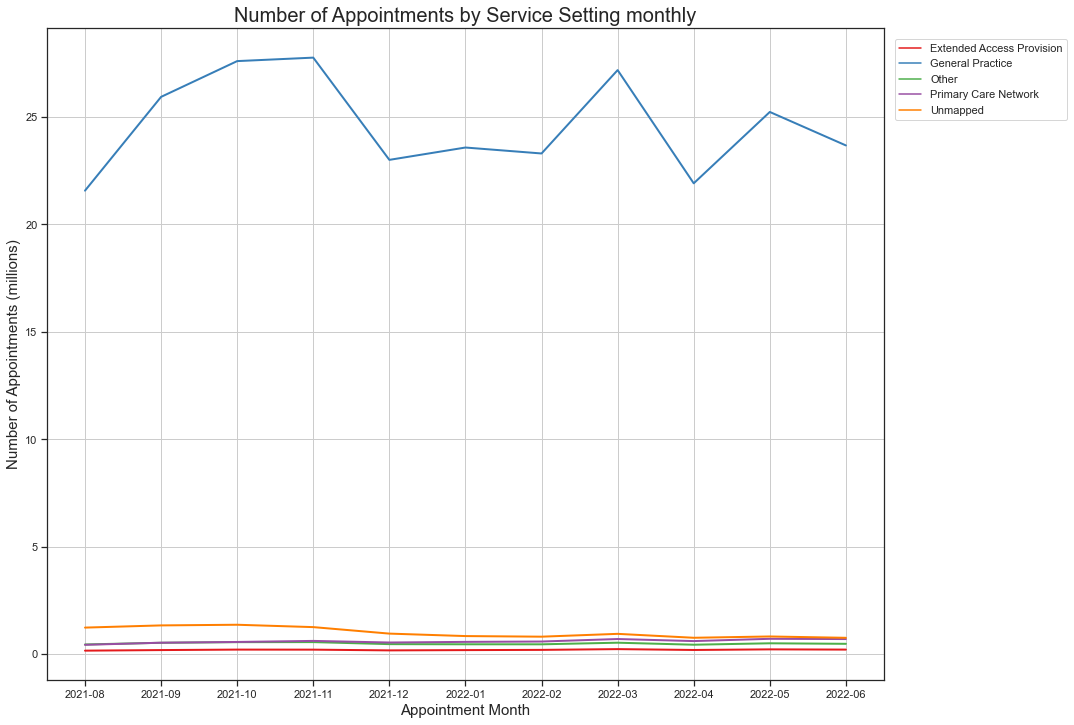

In [32]:
# Plot the appointments over the available date range, and review the service settings for months.
# Create a lineplot.
b=sns.lineplot(x='appointment_month', y='count_of_appointments', hue='service_setting',
            data=nc_ss, ci=None, palette = "Set1", linewidth=2)

# Annotate the axes, labels and ticks.
b.set_xlabel('Appointment Month', fontsize=15)
b.set_ylabel('Number of Appointments (millions)', fontsize=15)
b.set_title("Number of Appointments by Service Setting monthly", fontsize=20)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', borderaxespad=1)
ylabels = ['{:,.0f}'.format(y) for y in b.get_yticks()/1000000]
b.set_yticklabels(ylabels)
i=0

**Context types:**

In [33]:
# Create a separate data set that can be used in future weeks. 
nc_ct = nc \
 .groupby(['appointment_month', 'context_type'])[['count_of_appointments']] \
 .sum() \
 .reset_index()

# View output.
nc_ct

,appointment_month,context_type,count_of_appointments
0,2021-08,Care Related Encounter,20255235
1,2021-08,Inconsistent Mapping,2363093
2,2021-08,Unmapped,1233843
3,2021-09,Care Related Encounter,24404251
4,2021-09,Inconsistent Mapping,2782135
5,2021-09,Unmapped,1336115
6,2021-10,Care Related Encounter,26125201
7,2021-10,Inconsistent Mapping,2811977
8,2021-10,Unmapped,1366656
9,2021-11,Care Related Encounter,26282778


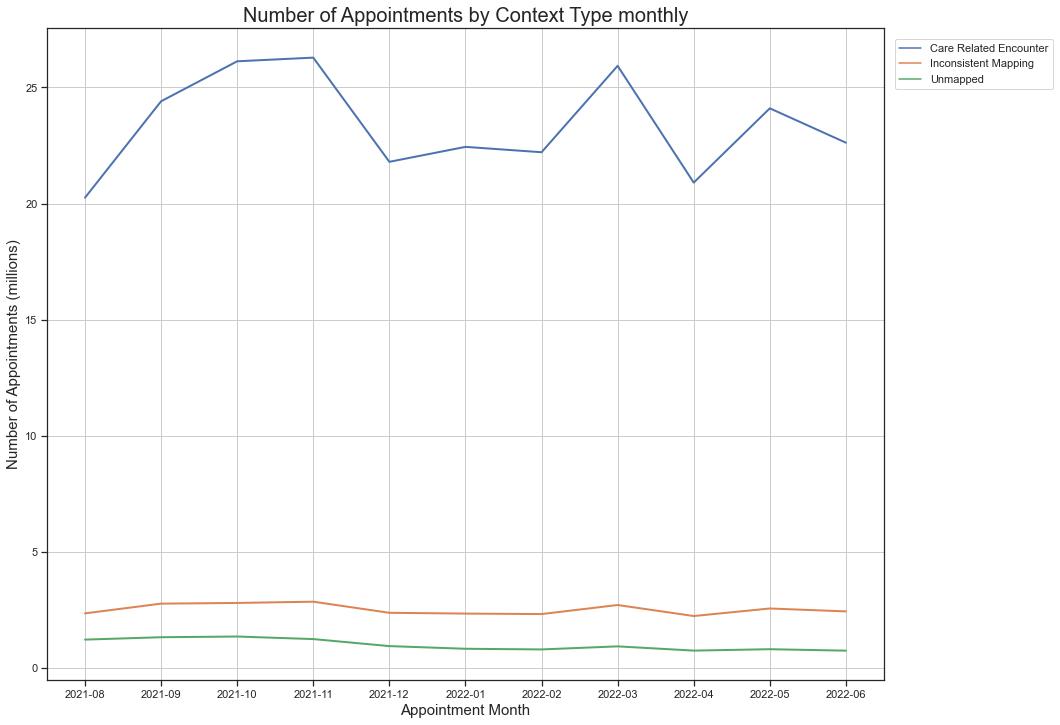

In [34]:
# Plot the appointments over the available date range, and review the context types for months.
# Create a lineplot.
b=sns.lineplot(x='appointment_month', y='count_of_appointments', hue='context_type',
            data=nc_ct, ci=None, linewidth=2)

# Annotate the axes, labels and ticks.
b.set_xlabel('Appointment Month', fontsize=15)
b.set_ylabel('Number of Appointments (millions)', fontsize=15)
b.set_title("Number of Appointments by Context Type monthly", fontsize=20)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', borderaxespad=1)
ylabels = ['{:,.0f}'.format(y) for y in b.get_yticks()/1000000]
b.set_yticklabels(ylabels)
i=0

**National categories:**

In [35]:
# Create a separate data set that can be used in future weeks. 
nc_nc = nc \
 .groupby(['appointment_month', 'national_category'])[['count_of_appointments']] \
 .sum() \
 .reset_index()

# View output.
nc_nc

,appointment_month,national_category,count_of_appointments
0,2021-08,Care Home Needs Assessment & Personalised Care...,29676
1,2021-08,Care Home Visit,47583
2,2021-08,Clinical Triage,3704207
3,2021-08,General Consultation Acute,4280920
4,2021-08,General Consultation Routine,7756045
...,...,...,...
193,2022-06,Social Prescribing Service,55066
194,2022-06,Structured Medication Review,187800
195,2022-06,Unmapped,758640
196,2022-06,Unplanned Clinical Activity,274491


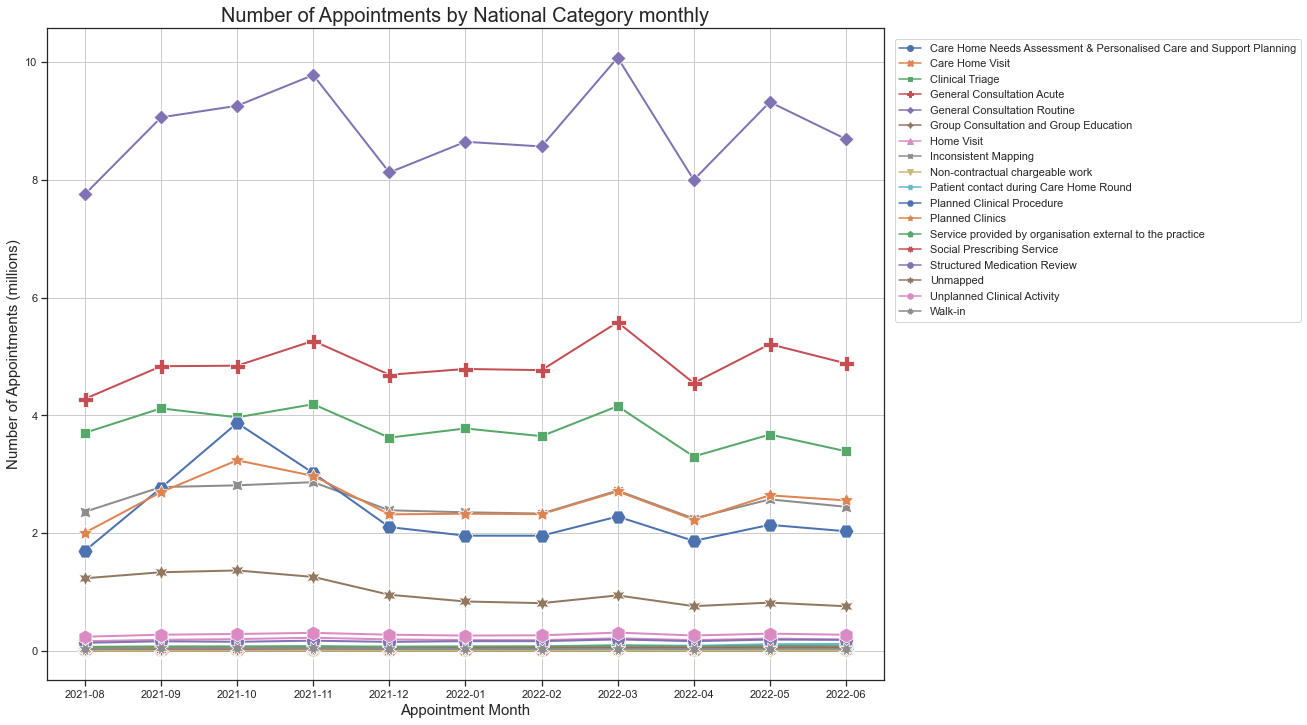

In [36]:
# Plot the appointments over the available date range, and review the national categories for months.
b=sns.lineplot(x='appointment_month', y='count_of_appointments', \
               hue='national_category', \
               data=nc_nc, ci=None, palette = 'deep', style='national_category', \
               markers=True, markersize=15, dashes=False, linewidth=2)

# Annotate the axes, labels and ticks.
b.set_xlabel('Appointment Month', fontsize=15)
b.set_ylabel('Number of Appointments (millions)', fontsize=15)
b.set_title("Number of Appointments by National Category monthly", fontsize=20)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', borderaxespad=1)
ylabels = ['{:,.0f}'.format(y) for y in b.get_yticks()/1000000]
b.set_yticklabels(ylabels)
i=0

### Objective 2
Create four visualisations indicating the number of appointments for service setting per season. The seasons are summer (August 2021), autumn (October 2021), winter (January 2022), and spring (April 2022).

**Summer (August 2021):**

In [37]:
# Create a separate data set that can be used in future weeks. 
nc_ss_summer = nc[nc.appointment_month == '2021-08'] \
    .groupby(['appointment_date', 'service_setting']) \
    [['count_of_appointments']] \
    .sum() \
    .reset_index()

# View output.
nc_ss_summer

,appointment_date,service_setting,count_of_appointments
0,2021-08-01,Extended Access Provision,438
1,2021-08-01,General Practice,3411
2,2021-08-01,Other,401
3,2021-08-01,Primary Care Network,323
4,2021-08-01,Unmapped,1054
...,...,...,...
150,2021-08-31,Extended Access Provision,8281
151,2021-08-31,General Practice,1125584
152,2021-08-31,Other,23181
153,2021-08-31,Primary Care Network,21789


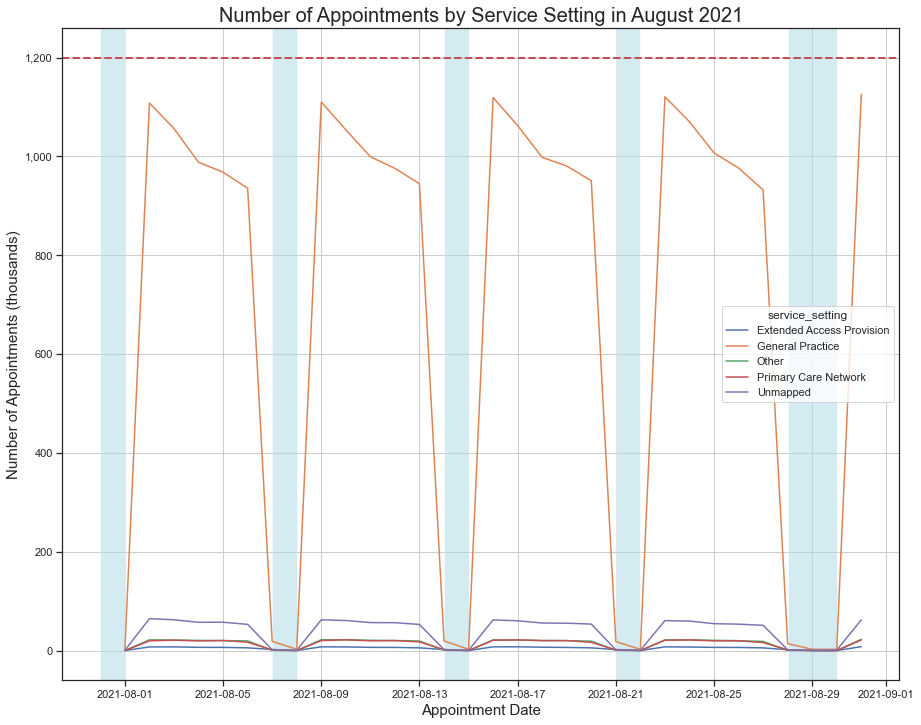

In [46]:
# Look at August 2021 in more detail to allow a closer look.
# Create a lineplot.
b=sns.lineplot(x='appointment_date', y='count_of_appointments', hue='service_setting',
            data=nc_ss_summer, ci=None)

# Annotate the axes, labels and ticks.
b.set_xlabel('Appointment Date', fontsize=15)
b.set_ylabel('Number of Appointments (thousands)', fontsize=15)
b.set_title("Number of Appointments by Service Setting in August 2021", fontsize=20)
ylabels = ['{:,.0f}'.format(y) for y in b.get_yticks()/1000]
b.set_yticklabels(ylabels)

# Add NHS daily limit line of 1,200,000 appointments.
plt.axhline(y=1200000, color='r', linestyle='--', linewidth=2)

# Highlighting the weekends and bank holidays in August 2021.
plt.axvspan('2021-07-31', '2021-08-01', facecolor='#ADD8E6', alpha=0.5)
plt.axvspan('2021-08-07', '2021-08-08', facecolor='#ADD8E6', alpha=0.5)
plt.axvspan('2021-08-14', '2021-08-15', facecolor='#ADD8E6', alpha=0.5)
plt.axvspan('2021-08-21', '2021-08-22', facecolor='#ADD8E6', alpha=0.5)
plt.axvspan('2021-08-28', '2021-08-30', facecolor='#ADD8E6', alpha=0.5)
i=0

**Autumn (October 2021):**

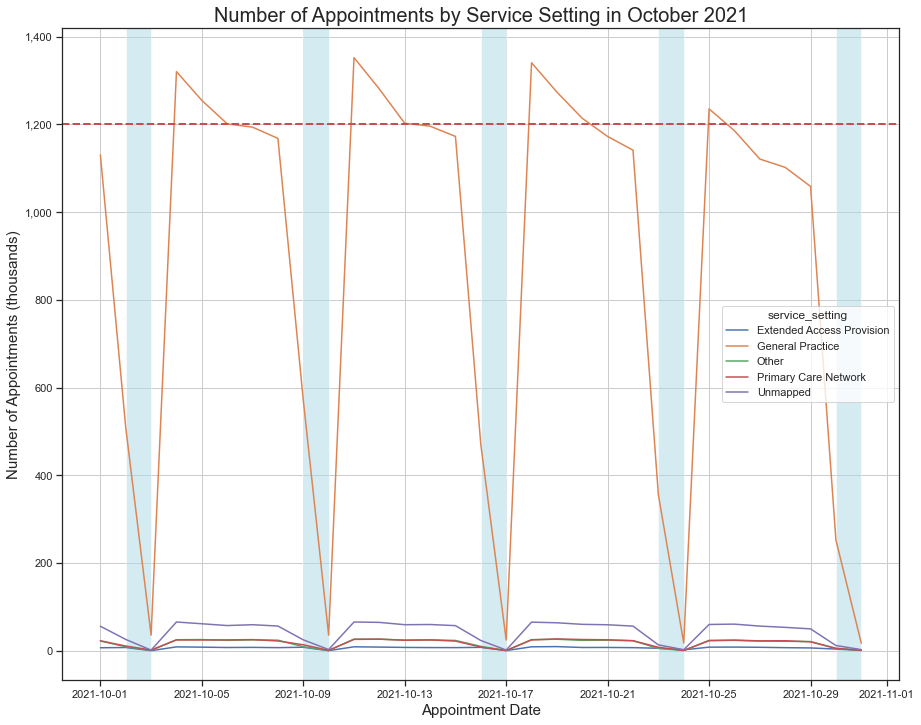

In [47]:
# Look at October 2021 in more detail to allow a closer look.
nc_ss_autumn = nc[nc.appointment_month == '2021-10'] \
    .groupby(['appointment_date', 'service_setting']) \
    [['count_of_appointments']] \
    .sum() \
    .reset_index()

# Create a lineplot for df with October 2021 data.
b=sns.lineplot(x='appointment_date', y='count_of_appointments', hue='service_setting',
            data=nc_ss_autumn, ci=None)
b.set_xlabel('Appointment Date', fontsize=15)
b.set_ylabel('Number of Appointments (thousands)', fontsize=15)
b.set_title("Number of Appointments by Service Setting in October 2021", fontsize=20)
ylabels = ['{:,.0f}'.format(y) for y in b.get_yticks()/1000]
b.set_yticklabels(ylabels)

# Add the NHS limit of 1,2000,000 appointments a day.
plt.axhline(y=1200000, color='r', linestyle='--', linewidth=2)

# Highlighting the weekends and bank holidays.
plt.axvspan('2021-10-02', '2021-10-03', facecolor='#ADD8E6', alpha=0.5)
plt.axvspan('2021-10-09', '2021-10-10', facecolor='#ADD8E6', alpha=0.5)
plt.axvspan('2021-10-16', '2021-10-17', facecolor='#ADD8E6', alpha=0.5)
plt.axvspan('2021-10-23', '2021-10-24', facecolor='#ADD8E6', alpha=0.5)
plt.axvspan('2021-10-30', '2021-10-31', facecolor='#ADD8E6', alpha=0.5)
i=0

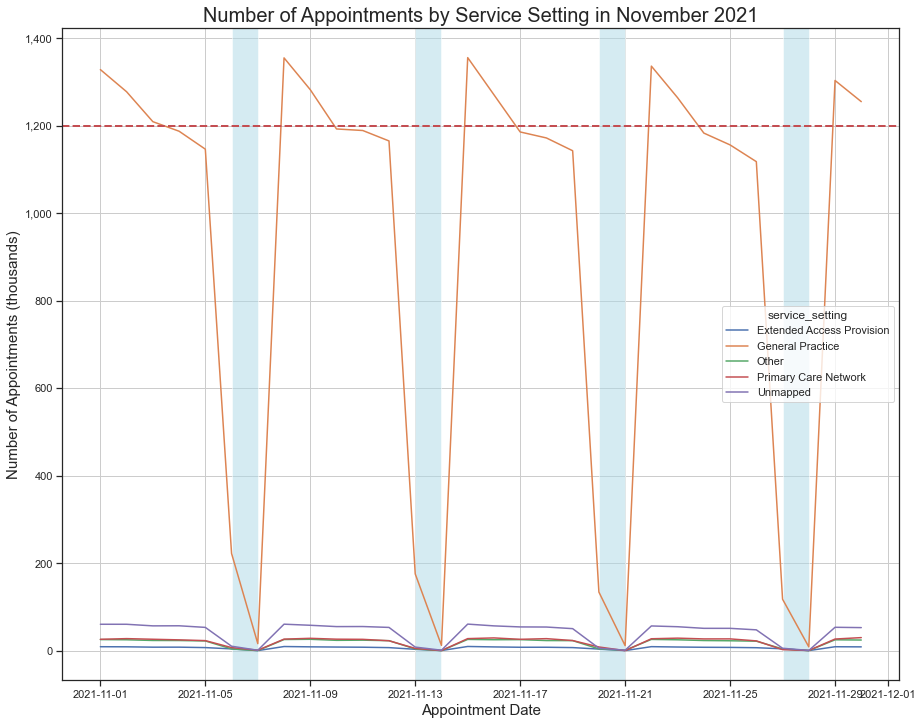

In [48]:
# Additional look at November 2021 as the busiest month by service setting.
nc_ss_nov = nc[nc.appointment_month == '2021-11'] \
    .groupby(['appointment_date', 'service_setting']) \
    [['count_of_appointments']] \
    .sum() \
    .reset_index()

# Create a lineplot for df with November 2021 data.
b=sns.lineplot(x='appointment_date', y='count_of_appointments', hue='service_setting',
            data=nc_ss_nov, ci=None)
b.set_xlabel('Appointment Date', fontsize=15)
b.set_ylabel('Number of Appointments (thousands)', fontsize=15)
b.set_title("Number of Appointments by Service Setting in November 2021", fontsize=20)
ylabels = ['{:,.0f}'.format(y) for y in b.get_yticks()/1000]
b.set_yticklabels(ylabels)

# Add the NHS limit of 1,2000,000 appointments a day.
plt.axhline(y=1200000, color='r', linestyle='--', linewidth=2)

# Highlighting the weekends and bank holidays.
plt.axvspan('2021-11-06', '2021-11-07', facecolor='#ADD8E6', alpha=0.5)
plt.axvspan('2021-11-13', '2021-11-14', facecolor='#ADD8E6', alpha=0.5)
plt.axvspan('2021-11-20', '2021-11-21', facecolor='#ADD8E6', alpha=0.5)
plt.axvspan('2021-11-27', '2021-11-28', facecolor='#ADD8E6', alpha=0.5)
i=0

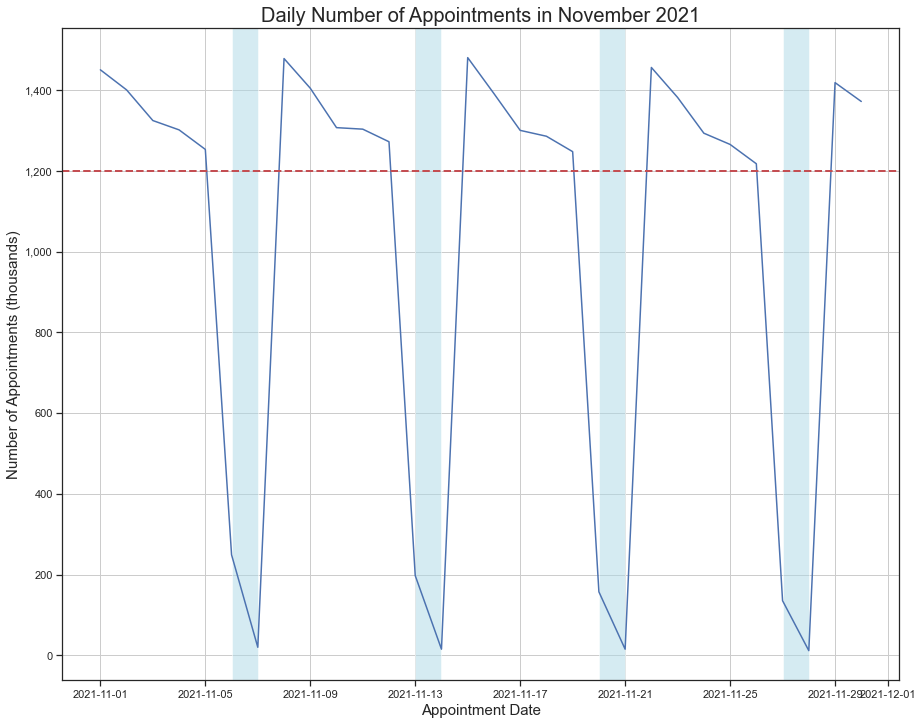

In [49]:
# Look at all appointments in November 2021.
nc_ss_nov = nc[nc.appointment_month == '2021-11'] \
    .groupby(['appointment_date'])[['count_of_appointments']] \
    .sum() \
    .reset_index()

# Create a lineplot.
b=sns.lineplot(x='appointment_date', y='count_of_appointments',data=nc_ss_nov, ci=None)
b.set_xlabel('Appointment Date', fontsize=15)
b.set_ylabel('Number of Appointments (thousands)', fontsize=15)
b.set_title("Daily Number of Appointments in November 2021", fontsize=20)
ylabels = ['{:,.0f}'.format(y) for y in b.get_yticks()/1000]
b.set_yticklabels(ylabels)

# Add the NHS limit of 1,2000,000 appointments a day.
plt.axhline(y=1200000, color='r', linestyle='--', linewidth=2)

# Highlighting the weekends and bank holidays.
plt.axvspan('2021-11-06', '2021-11-07', facecolor='#ADD8E6', alpha=0.5)
plt.axvspan('2021-11-13', '2021-11-14', facecolor='#ADD8E6', alpha=0.5)
plt.axvspan('2021-11-20', '2021-11-21', facecolor='#ADD8E6', alpha=0.5)
plt.axvspan('2021-11-27', '2021-11-28', facecolor='#ADD8E6', alpha=0.5)
i=0

**Winter (January 2022):**

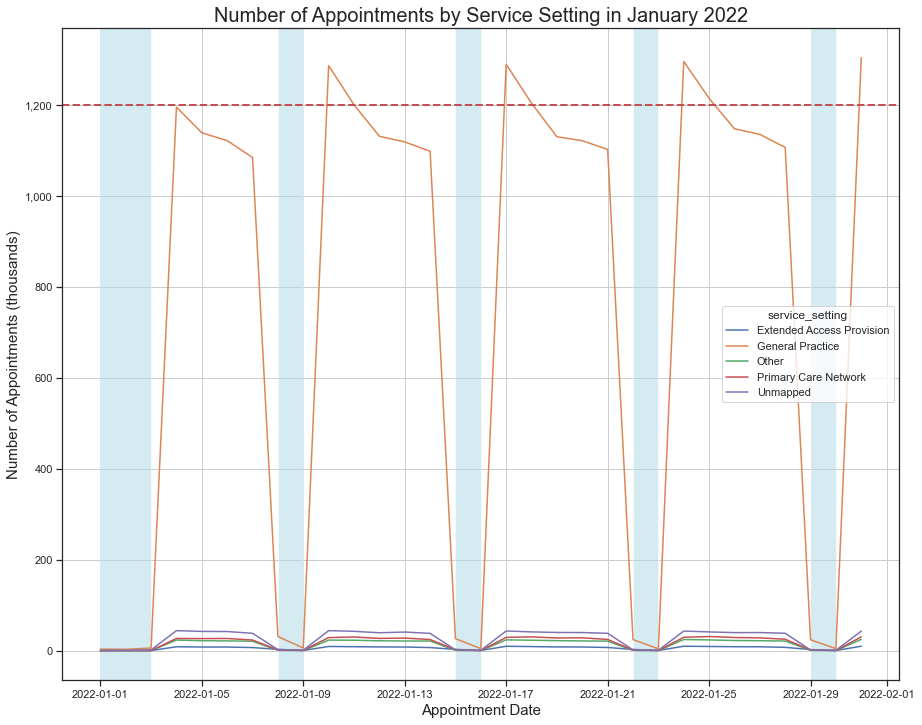

In [50]:
# Look at January 2022 in more detail to allow a closer look.
nc_ss_winter = nc[nc.appointment_month == '2022-01'] \
    .groupby(['appointment_date', 'service_setting']) \
    [['count_of_appointments']] \
    .sum() \
    .reset_index()

# Create a lineplot.
b=sns.lineplot(x='appointment_date', y='count_of_appointments', hue='service_setting',
            data=nc_ss_winter, ci=None)
b.set_xlabel('Appointment Date', fontsize=15)
b.set_ylabel('Number of Appointments (thousands)', fontsize=15)
b.set_title("Number of Appointments by Service Setting in January 2022", fontsize=20)
ylabels = ['{:,.0f}'.format(y) for y in b.get_yticks()/1000]
b.set_yticklabels(ylabels)

# Add the NHS limit of 1,2000,000 appointments a day.
plt.axhline(y=1200000, color='r', linestyle='--', linewidth=2)

# Highlighting the weekends and bank holidays.
plt.axvspan('2022-01-01', '2022-01-03', facecolor='#ADD8E6', alpha=0.5)
plt.axvspan('2022-01-08', '2022-01-09', facecolor='#ADD8E6', alpha=0.5)
plt.axvspan('2022-01-15', '2022-01-16', facecolor='#ADD8E6', alpha=0.5)
plt.axvspan('2022-01-22', '2022-01-23', facecolor='#ADD8E6', alpha=0.5)
plt.axvspan('2022-01-29', '2022-01-30', facecolor='#ADD8E6', alpha=0.5)
i=0

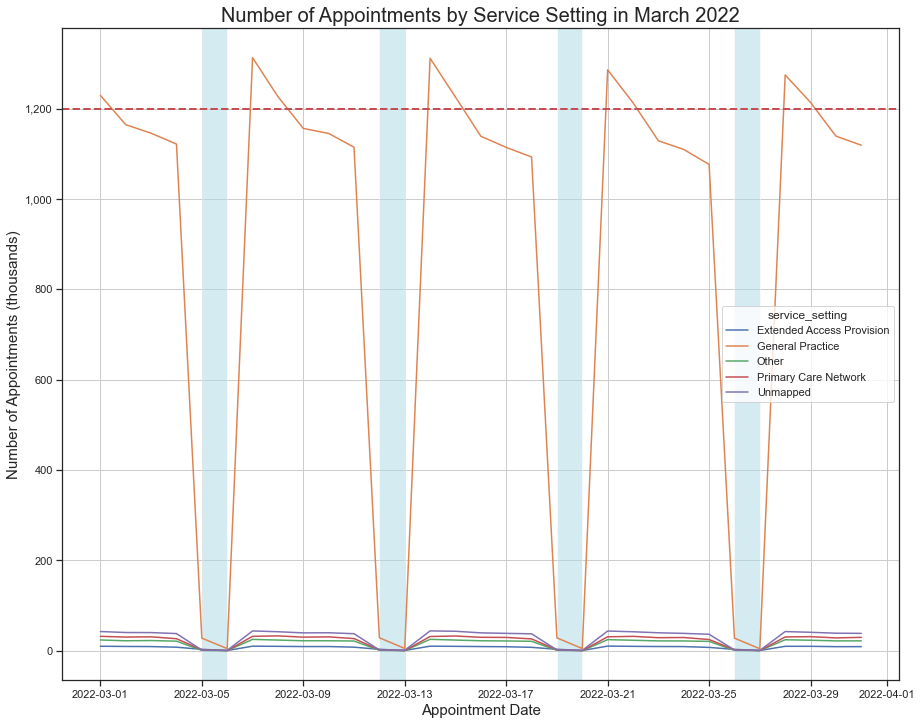

In [51]:
# Additional lineplot for a busy period of March 2022.
nc_ss_march = nc[nc.appointment_month == '2022-03'] \
    .groupby(['appointment_date', 'service_setting']) \
    [['count_of_appointments']] \
    .sum() \
    .reset_index()

# Create a lineplot.
b=sns.lineplot(x='appointment_date', y='count_of_appointments', hue='service_setting',
            data=nc_ss_march, ci=None)

b.set_xlabel('Appointment Date', fontsize=15)
b.set_ylabel('Number of Appointments (thousands)', fontsize=15)
b.set_title("Number of Appointments by Service Setting in March 2022", fontsize=20)
ylabels = ['{:,.0f}'.format(y) for y in b.get_yticks()/1000]
b.set_yticklabels(ylabels)

# Add the NHS limit of 1,2000,000 appointments a day.
plt.axhline(y=1200000, color='r', linestyle='--', linewidth=2)

# Highlighting the weekends and bank holidays.
plt.axvspan('2022-03-05', '2022-03-06', facecolor='#ADD8E6', alpha=0.5)
plt.axvspan('2022-03-12', '2022-03-13', facecolor='#ADD8E6', alpha=0.5)
plt.axvspan('2022-03-19', '2022-03-20', facecolor='#ADD8E6', alpha=0.5)
plt.axvspan('2022-03-26', '2022-03-27', facecolor='#ADD8E6', alpha=0.5)
i=0

**Spring (April 2022):**

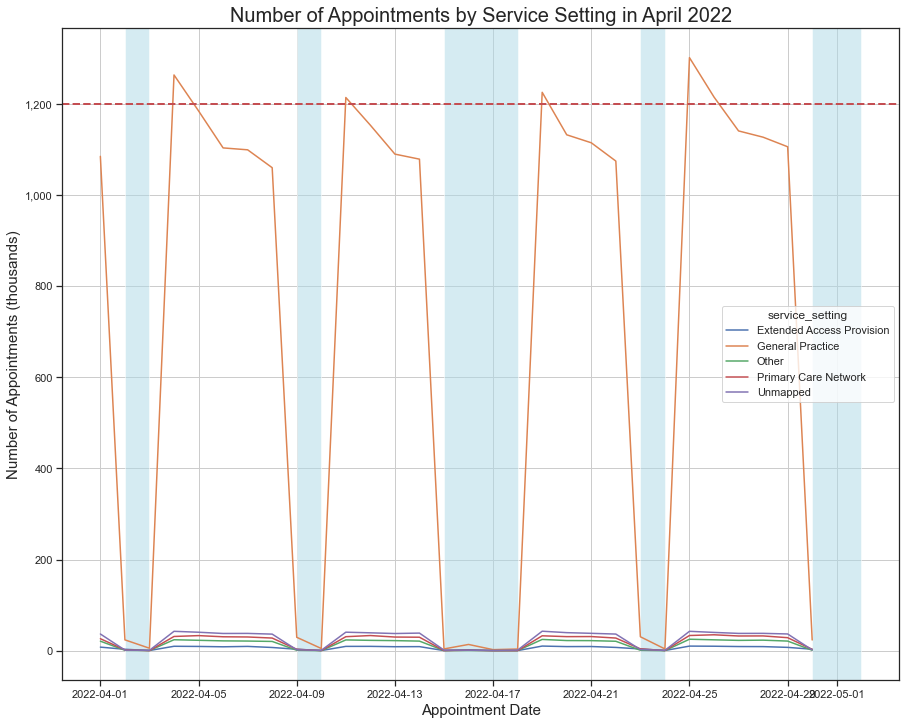

In [52]:
# Look at April 2022 in more detail to allow a closer look.
nc_ss_spring = nc[nc.appointment_month == '2022-04'] \
    .groupby(['appointment_date', 'service_setting']) \
    [['count_of_appointments']] \
    .sum() \
    .reset_index()

# Create a lineplot.
b=sns.lineplot(x='appointment_date', y='count_of_appointments', hue='service_setting',
            data=nc_ss_spring, ci=None)

b.set_xlabel('Appointment Date', fontsize=15)
b.set_ylabel('Number of Appointments (thousands)', fontsize=15)
b.set_title("Number of Appointments by Service Setting in April 2022", fontsize=20)
ylabels = ['{:,.0f}'.format(y) for y in b.get_yticks()/1000]
b.set_yticklabels(ylabels)

# Add the NHS limit of 1,2000,000 appointments a day.
plt.axhline(y=1200000, color='r', linestyle='--', linewidth=2)

# Highlighting the weekends and bank holidays.
plt.axvspan('2022-04-02', '2022-04-03', facecolor='#ADD8E6', alpha=0.5)
plt.axvspan('2022-04-09', '2022-04-10', facecolor='#ADD8E6', alpha=0.5)
plt.axvspan('2022-04-15', '2022-04-18', facecolor='#ADD8E6', alpha=0.5)
plt.axvspan('2022-04-23', '2022-04-24', facecolor='#ADD8E6', alpha=0.5)
plt.axvspan('2022-04-30', '2022-05-02', facecolor='#ADD8E6', alpha=0.5)
i=0

## Activity 4 conclusions:
 **Objective 1:** monthly trends by looking at 3 visualisations indicating the number of appointments per month for service settings, context types, and national categories.
   - Df used is nc. Grouped(df.groupby()) by month and a respective parameter (service settings, context types, and national categories) and aggregated (.sum()) number of appointments to greate 3 subsets (nc_ss, nc_ct and nc_nc).
   - Lineplots used to see dynamic over time. Hue parameter added to see each of the parameters attribution.
   - By service setting: GP
   - By context type: Care Related Encounter
   - By national category: General Consultation Routine and Acute, Clinical Triage.

**Objective 2:** daily trends by looking at 4 visualisations indicating the number of appointments for service setting per season. The seasons are summer (August 2021), autumn (October 2021), winter (January 2022), and spring (April 2022)
   - Filtered the data to use appropriate month, grouped (df.groupby()) by appointement day and service settings and aggregated (.sum()) number of appointments to greate 4 subsets (nc_ss, nc_ct and nc_nc).
   - Lineplots used to see the dynamic each month. Hue parameter added by service setting.
   - All of them have weekend/bank holidays effect with number of appointment delivered by GP picking every Monday(next day after bank holiday), exceeding the limit of 1,200,000 a day, especially during the pick seasons!

# Assignment activity 5

### Analyse tweets from Twitter with hashtags related to healthcare in the UK.

In [53]:
# Libraries and settings needed for analysis
import pandas as pd
import seaborn as sns

# Set figure size.
sns.set(rc={'figure.figsize':(15, 12)})

# Set the plot style as white.
sns.set_style('white')

# Maximum column width to display
pd.options.display.max_colwidth = 200

In [54]:
# Load the data set.
tweets = pd.read_csv('tweets.csv')

# View the DataFrame.
print(tweets.dtypes)
tweets.head()

tweet_id                    int64
tweet_full_text            object
tweet_entities             object
tweet_entities_hashtags    object
tweet_metadata             object
tweet_retweet_count         int64
tweet_favorite_count        int64
tweet_favorited              bool
tweet_retweeted              bool
tweet_lang                 object
dtype: object


,tweet_id,tweet_full_text,tweet_entities,tweet_entities_hashtags,tweet_metadata,tweet_retweet_count,tweet_favorite_count,tweet_favorited,tweet_retweeted,tweet_lang
0,1567629223795527681,"As Arkansas’ first Comprehensive Stroke Certified Center, UAMS provides Arkansans with access to the most advanced stoke care. Join us in our mission to make a difference in the health and well-be...","{'hashtags': [{'text': 'Healthcare', 'indices': [253, 264]}], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/yw0cstfmSI', 'expanded_url': 'https://bit.ly/3BiSKbs', 'display_url...",#Healthcare,"{'iso_language_code': 'en', 'result_type': 'recent'}",0,0,False,False,en
1,1567582846612553728,RT @AndreaGrammer: Work-life balance is at the foundation of how decisions are made and where #PremiseHealth is headed. We're #hiring for…,"{'hashtags': [{'text': 'PremiseHealth', 'indices': [94, 108]}, {'text': 'hiring', 'indices': [127, 134]}], 'symbols': [], 'user_mentions': [{'screen_name': 'AndreaGrammer', 'name': 'Andrea Grammer...","#PremiseHealth, #hiring","{'iso_language_code': 'en', 'result_type': 'recent'}",2,0,False,False,en
2,1567582787070304256,RT @OntarioGreens: $10 billion can go a long way to fixing our broken #Healthcare system.\n\nYet Doug Ford would rather spend it ALL on a hig…,"{'hashtags': [{'text': 'Healthcare', 'indices': [70, 81]}], 'symbols': [], 'user_mentions': [{'screen_name': 'OntarioGreens', 'name': 'Green Party of Ontario', 'id': 37115912, 'id_str': '37115912'...",#Healthcare,"{'iso_language_code': 'en', 'result_type': 'recent'}",39,0,False,False,en
3,1567582767625428992,RT @modrnhealthcr: 🚨#NEW:🚨 Insurance companies are figuring out the best ways to collect information about members’ race and ethnicity data…,"{'hashtags': [{'text': 'NEW', 'indices': [20, 24]}], 'symbols': [], 'user_mentions': [{'screen_name': 'modrnhealthcr', 'name': 'Modern Healthcare', 'id': 18935711, 'id_str': '18935711', 'indices':...",#NEW,"{'iso_language_code': 'en', 'result_type': 'recent'}",5,0,False,False,en
4,1567582720460570625,"ICYMI: Our recent blogs on Cybersecurity in Accounting https://t.co/4nnK0FiVVL and Digital Transformation in Healthcare Finance https://t.co/jIqn52lHD3 are a great read, take a look!\n\n#blogs #di...","{'hashtags': [{'text': 'blogs', 'indices': [184, 190]}, {'text': 'digitaltransformation', 'indices': [191, 213]}, {'text': 'cybersecurity', 'indices': [214, 228]}, {'text': 'accounting', 'indices'...","#blogs, #digitaltransformation, #cybersecurity, #accounting, #finance, #healthcare","{'iso_language_code': 'en', 'result_type': 'recent'}",0,0,False,False,en


In [55]:
# Explore the metadata.
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1174 entries, 0 to 1173
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   tweet_id                 1174 non-null   int64 
 1   tweet_full_text          1174 non-null   object
 2   tweet_entities           1174 non-null   object
 3   tweet_entities_hashtags  1007 non-null   object
 4   tweet_metadata           1174 non-null   object
 5   tweet_retweet_count      1174 non-null   int64 
 6   tweet_favorite_count     1174 non-null   int64 
 7   tweet_favorited          1174 non-null   bool  
 8   tweet_retweeted          1174 non-null   bool  
 9   tweet_lang               1174 non-null   object
dtypes: bool(2), int64(3), object(5)
memory usage: 75.8+ KB


In [56]:
# Explore the data set.
tweets.describe()

,tweet_id,tweet_retweet_count,tweet_favorite_count
count,1.174000e+03,1174.000000,1174.00000
mean,1.567612e+18,8.629472,0.37138
std,2.427553e+13,29.784675,2.04470
min,1.567574e+18,0.000000,0.00000
25%,1.567590e+18,0.000000,0.00000
50%,1.567611e+18,1.000000,0.00000
75%,1.567633e+18,3.000000,0.00000
max,1.567655e+18,303.000000,42.00000


In [57]:
# Would it be useful to only look at retweeted and favourite tweet messages?
print(tweets['tweet_retweet_count'].value_counts())
print(tweets['tweet_favorite_count'].value_counts())
# Explain your answer.
# Looking at the count of retweeted and favourite tweet messages wouldn’t make much sense
# as the most of them were not retweeted at all (526 out of 1174 were never retweeted) or
# favoured (1027 out of 1174 favourite zero times). 

0      526
1      215
2      114
3       70
5       35
4       27
7       18
12      16
8       15
73      14
9       13
6       12
208     12
35      10
37       6
11       6
10       5
53       5
44       4
150      4
63       4
76       3
85       3
41       3
62       3
207      3
68       3
78       2
23       2
24       2
72       2
16       2
13       1
49       1
48       1
15       1
107      1
14       1
79       1
20       1
39       1
19       1
303      1
57       1
40       1
54       1
169      1
Name: tweet_retweet_count, dtype: int64
0     1027
1       91
2       16
3       13
4        7
5        5
6        2
17       1
12       1
10       1
8        1
13       1
11       1
7        1
20       1
28       1
14       1
18       1
9        1
42       1
Name: tweet_favorite_count, dtype: int64


In [58]:
# Create a new DataFrame containing only the text.
tweets_text = tweets[['tweet_full_text']]

# View the DataFrame of full tweets.
tweets_text.head()

,tweet_full_text
0,"As Arkansas’ first Comprehensive Stroke Certified Center, UAMS provides Arkansans with access to the most advanced stoke care. Join us in our mission to make a difference in the health and well-be..."
1,RT @AndreaGrammer: Work-life balance is at the foundation of how decisions are made and where #PremiseHealth is headed. We're #hiring for…
2,RT @OntarioGreens: $10 billion can go a long way to fixing our broken #Healthcare system.\n\nYet Doug Ford would rather spend it ALL on a hig…
3,RT @modrnhealthcr: 🚨#NEW:🚨 Insurance companies are figuring out the best ways to collect information about members’ race and ethnicity data…
4,"ICYMI: Our recent blogs on Cybersecurity in Accounting https://t.co/4nnK0FiVVL and Digital Transformation in Healthcare Finance https://t.co/jIqn52lHD3 are a great read, take a look!\n\n#blogs #di..."


In [59]:
# Loop through the messages, and create a list of values containing the # symbol.
tags=[]

# Run a loop to look at the hashtags (#) used in tweets.
for y in [x.split(' ') for x in tweets['tweet_full_text'].values]:
    for z in y:
        if '#' in z:
            # Change to lowercase.
            tags.append(z.lower())

# View the list with all hashtags found.            
tags

['#healthcare',
 '#premisehealth',
 '#hiring',
 '#healthcare',
 '🚨#new:🚨',
 'look!\n\n#blogs',
 '#digitaltransformation',
 '#cybersecurity',
 '#accounting',
 '#finance',
 '#healthcare',
 'https://t.co/jrgqeqdme4\n.\n#firstcoastcna',
 '#cnaexam',
 '#cnaexampreparation',
 '#jacksonville',
 '#cnatraining',
 '#nurse',
 '#nursing',
 '#nurselife',
 '#nursepractitioner',
 '#nurseproblems',
 '#nursingschool',
 '#healthcare',
 '🚨#new:🚨',
 '#disparities.',
 '@karahartnett\n#healthcare',
 '#alert',
 '#insurance',
 '#data\nhttps://t.co/h9hlamr7p9',
 '#healthcare',
 '#healthcare',
 '❤️\n\n#healthcare',
 '#healthcare',
 '#hcldr',
 '#premisehealth',
 '#hiring',
 '#premisehealth',
 '#hiring',
 '#healthcare',
 '#qualitypatientcare',
 '#jobs',
 '#job',
 '#ascp2022',
 '#ascp100.',
 '#healthcare',
 '#healthsecretary',
 '#healthcare',
 '#ai,',
 '#sdoh,',
 '#healthcare',
 '\nhttps://t.co/ewe7jntj1e\n#tropicana',
 '#real',
 '#juice',
 '#healthcare',
 '#watch',
 '#worms',
 '#fruits',
 '#healthtips',
 '#tips',

In [60]:
# Create series from a list.
tags = pd.Series(tags).value_counts()

# View the first 30 hashtags from the series.
tags.head(30)

#healthcare                    716
#health                         80
#medicine                       41
#ai                             40
#job                            38
#medical                        35
#strategy                       30
#pharmaceutical                 28
#digitalhealth                  25
#pharma                         25
#marketing                      25
#medtwitter                     24
#biotech                        24
#competitiveintelligence        24
#meded                          23
#vaccine                        18
#hiring                         18
#news                           17
#machinelearning                17
#technology                     17
#coronavirus                    16
#womeninmedicine                16
#covid                          16
#competitivemarketing           16
#wellness                       15
#healthtech                     15
#doctorofveterinarymedicine     14
#science                        14
#medicare           

In [61]:
# Convert the series to a DataFrame in preparation for visualisation.
data = pd.DataFrame(tags).reset_index()

# Rename the columns.
data.columns=['word','count']

# Check the size and the data series.
print(data.shape)
data.head()

(1754, 2)


,word,count
0,#healthcare,716
1,#health,80
2,#medicine,41
3,#ai,40
4,#job,38


In [62]:
# Check count datatype.
print(data.dtypes)


word     object
count     int64
dtype: object


In [63]:
# Display records where the count is larger than 10.
above_10 = data[data['count'] > 10]

# View the dataframe.
above_10

,word,count
0,#healthcare,716
1,#health,80
2,#medicine,41
3,#ai,40
4,#job,38
5,#medical,35
6,#strategy,30
7,#pharmaceutical,28
8,#digitalhealth,25
9,#pharma,25


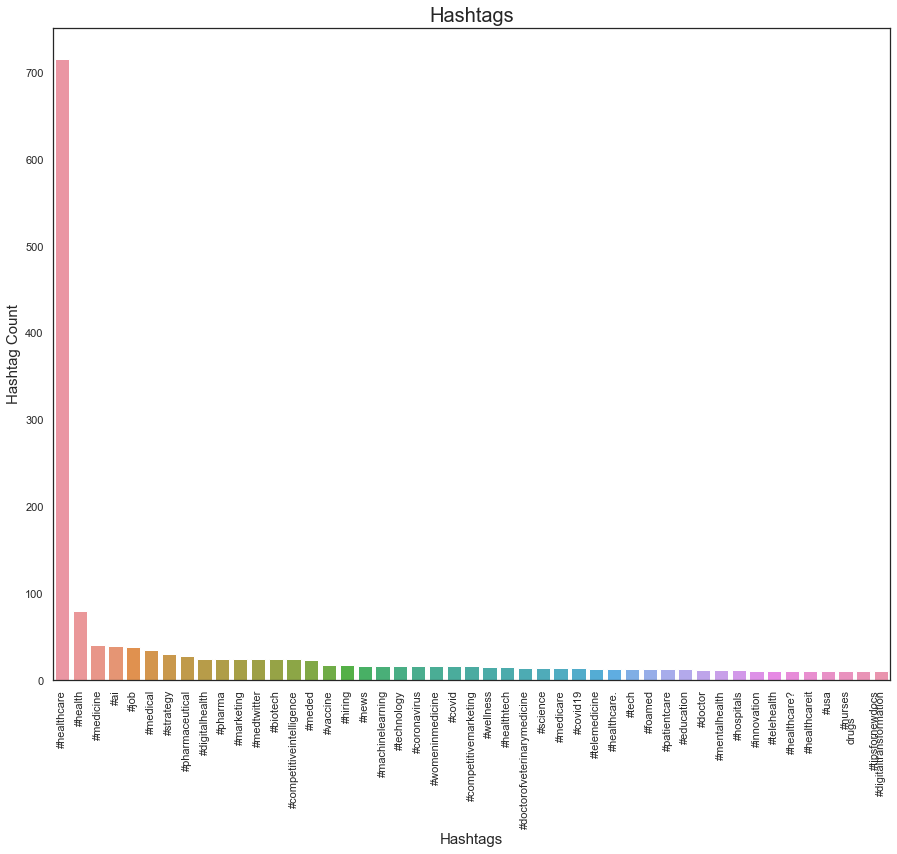

In [64]:
# Create a Seaborn barplot indicating records with a count >10 records.
graph = sns.barplot(x='word', y='count' , data=above_10)

# Annotate the axes, labels and ticks.
graph.set_xticklabels(graph.get_xticklabels(),rotation=90)
graph.set_xlabel('Hashtags', fontsize=15)
graph.set_ylabel('Hashtag Count', fontsize=15)
graph.set_title('Hashtags', fontsize=20)
i=0

In [65]:
# Look at descriptive statistics.
above_10.describe()

,count
count,47.000000
mean,34.404255
std,102.297235
min,11.000000
25%,13.000000
50%,16.000000
75%,24.000000
max,716.000000


In [66]:
# Improve the dataframe above_10 with IQR method to remove the outliners.
# Define Q1 (25% quantile), Q3 (75% quantile) and IQR(interquantile range)=Q3-Q1.
Q1 = above_10['count'].quantile(0.25)
Q3 = above_10['count'].quantile(0.75)
IQR = Q3-Q1

# Calculate lower and upper bounds for the new subset of data.
lower_bound = Q1 - IQR*1.5
upper_bound = Q3 + IQR*1.5
lower_bound, upper_bound

# Create a new sample with 'count' values within the bounds.
sample = above_10[(above_10['count'] > lower_bound) & (above_10['count'] < upper_bound)]
sample

,word,count
3,#ai,40
4,#job,38
5,#medical,35
6,#strategy,30
7,#pharmaceutical,28
8,#digitalhealth,25
9,#pharma,25
10,#marketing,25
11,#medtwitter,24
12,#biotech,24


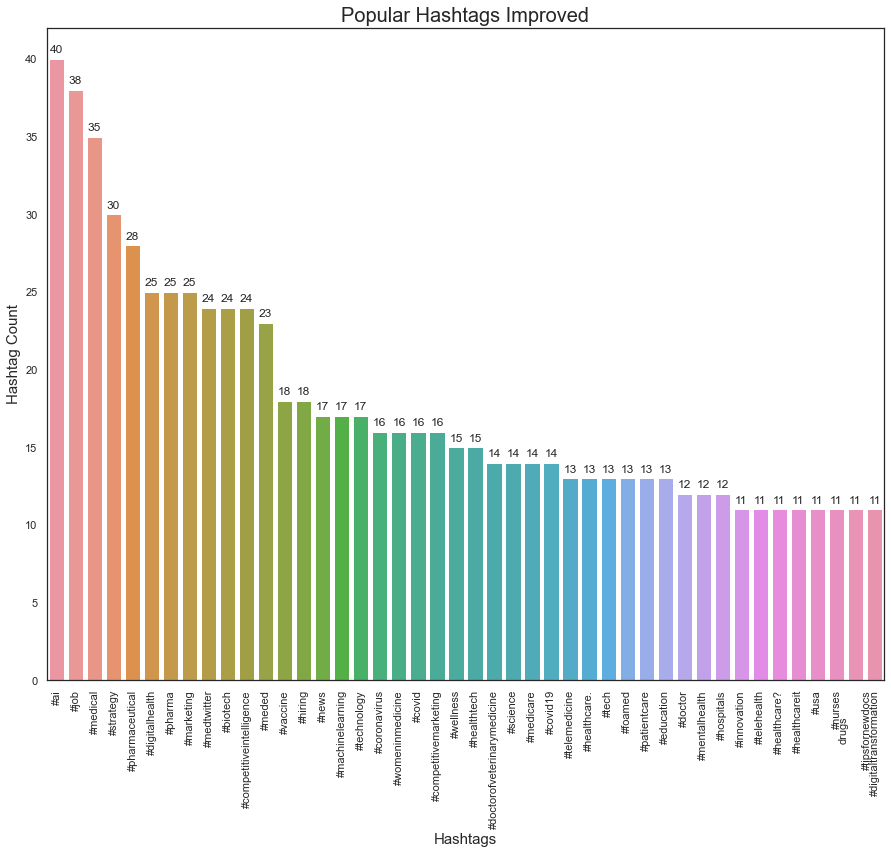

In [67]:
# Create a barplot based on sample dataframe.
graph = sns.barplot(x='word', y='count' , data=sample)

# Annotate the axes, labels and ticks.
graph.set_xticklabels(graph.get_xticklabels(),rotation=90)
graph.set_xlabel('Hashtags', fontsize=15)
graph.set_ylabel('Hashtag Count', fontsize=15)
graph.set_title('Popular Hashtags Improved', fontsize=20)

# Add annotation of values.
for p in graph.patches:
    graph.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

## Activity 5 conclusions:
Analyse tweeter's hashtags related to healthcare. 
 - Look at number of times (df[col].count_values()) tweets were retweeted or marked favourite. Most of them has zero or 1 count. Looked at hashtags used instead.
 - Created list of the most popular hashtags from full tweets column.
 - Created df data with hashtag and its count. Filtered the ones used more than 10 times (#healthcare - 716).
 - Barplot is used to see the count (value) of each of the hashtag (set of discrete categories).
 - To improve the visualisation removed the outliers using IQR and lower and upper bounds (#ai,#job,#medical).

# Assignment activity 6

### Investigate the main concerns posed by the NHS. 

In [68]:
# View ar DataFrame and sense check the data and size.
print(ar.shape)
print(ar.dtypes)
ar.head()

(596821, 7)
icb_ons_code                         object
appointment_month                    object
appointment_status                   object
hcp_type                             object
appointment_mode                     object
time_between_book_and_appointment    object
count_of_appointments                 int64
dtype: object


,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments
0,E54000034,2020-01,Attended,GP,Face-to-Face,1 Day,8107
1,E54000034,2020-01,Attended,GP,Face-to-Face,15 to 21 Days,6791
2,E54000034,2020-01,Attended,GP,Face-to-Face,2 to 7 Days,20686
3,E54000034,2020-01,Attended,GP,Face-to-Face,22 to 28 Days,4268
4,E54000034,2020-01,Attended,GP,Face-to-Face,8 to 14 Days,11971


In [69]:
# Print the min and max dates.
print(ar['appointment_month'].min())
print(ar['appointment_month'].max())

2020-01
2022-06


In [70]:
# Filter the data set to only look at data from 2021-08 onwards.
ar = ar[ar['appointment_month']>='2021-08']
ar.head()

,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments
3652,E54000034,2021-08,Attended,GP,Face-to-Face,1 Day,6553
3653,E54000034,2021-08,Attended,GP,Face-to-Face,15 to 21 Days,2390
3654,E54000034,2021-08,Attended,GP,Face-to-Face,2 to 7 Days,10547
3655,E54000034,2021-08,Attended,GP,Face-to-Face,22 to 28 Days,937
3656,E54000034,2021-08,Attended,GP,Face-to-Face,8 to 14 Days,4961


**Question 1:** Should the NHS start looking at increasing staff levels? 

In [71]:
# Create an aggregated data set to review the different features.
ar_agg = ar.groupby([
    'appointment_month', 'hcp_type', 'appointment_status',
    'appointment_mode', 'time_between_book_and_appointment'
    ])[['count_of_appointments']].sum() \
    .reset_index()

# View the DataFrame.
ar_agg.head()

,appointment_month,hcp_type,appointment_status,appointment_mode,time_between_book_and_appointment,count_of_appointments
0,2021-08,GP,Attended,Face-to-Face,1 Day,507835
1,2021-08,GP,Attended,Face-to-Face,15 to 21 Days,194726
2,2021-08,GP,Attended,Face-to-Face,2 to 7 Days,959486
3,2021-08,GP,Attended,Face-to-Face,22 to 28 Days,102111
4,2021-08,GP,Attended,Face-to-Face,8 to 14 Days,398772


In [72]:
# Determine the total number of appointments per month.
ar_df = ar_agg \
 .groupby(['appointment_month'])[['count_of_appointments']] \
 .sum() \
 .reset_index()

# Add a new column to indicate the average utilisation of services.
# Monthly aggregate / 30 to get to a daily value.
ar_df['utilisation'] = (ar_df['count_of_appointments']/30).round(1)

# Calculate the utilisation rate taking 1,200,000 as the NHS capacity limit.
ar_df['utilisation rate %'] = (ar_df['utilisation']/1200000*100).round(1).astype(str)+'%'

# View the DataFrame.
ar_df

,appointment_month,count_of_appointments,utilisation,utilisation rate %
0,2021-08,23852171,795072.4,66.3%
1,2021-09,28522501,950750.0,79.2%
2,2021-10,30303834,1010127.8,84.2%
3,2021-11,30405070,1013502.3,84.5%
4,2021-12,25140776,838025.9,69.8%
5,2022-01,25635474,854515.8,71.2%
6,2022-02,25355260,845175.3,70.4%
7,2022-03,29595038,986501.3,82.2%
8,2022-04,23913060,797102.0,66.4%
9,2022-05,27495508,916516.9,76.4%


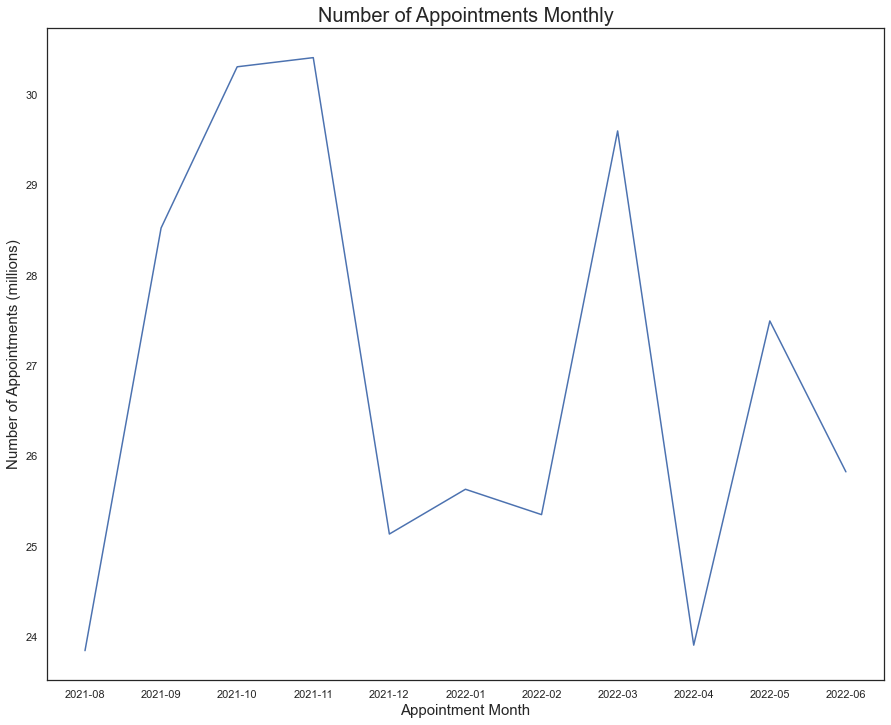

In [73]:
# Plot sum of count of monthly visits.
# Convert the appointment_month to string data type for ease of visualisation.
ar_df['appointment_month'] = ar_df['appointment_month'].astype("string")

# Create a lineplot with Seaborn.
b=sns.lineplot(x='appointment_month', y='count_of_appointments', data=ar_df)

# Annotate the axes, labels and ticks.
b.set_xlabel('Appointment Month', fontsize=15)
b.set_ylabel('Number of Appointments (millions)', fontsize=15)
b.set_title("Number of Appointments Monthly", fontsize=20)
ylabels = ['{:,.0f}'.format(y) for y in b.get_yticks()/1000000]
b.set_yticklabels(ylabels)
sns.set_style('ticks',{'axes.grid' : True})
i=0

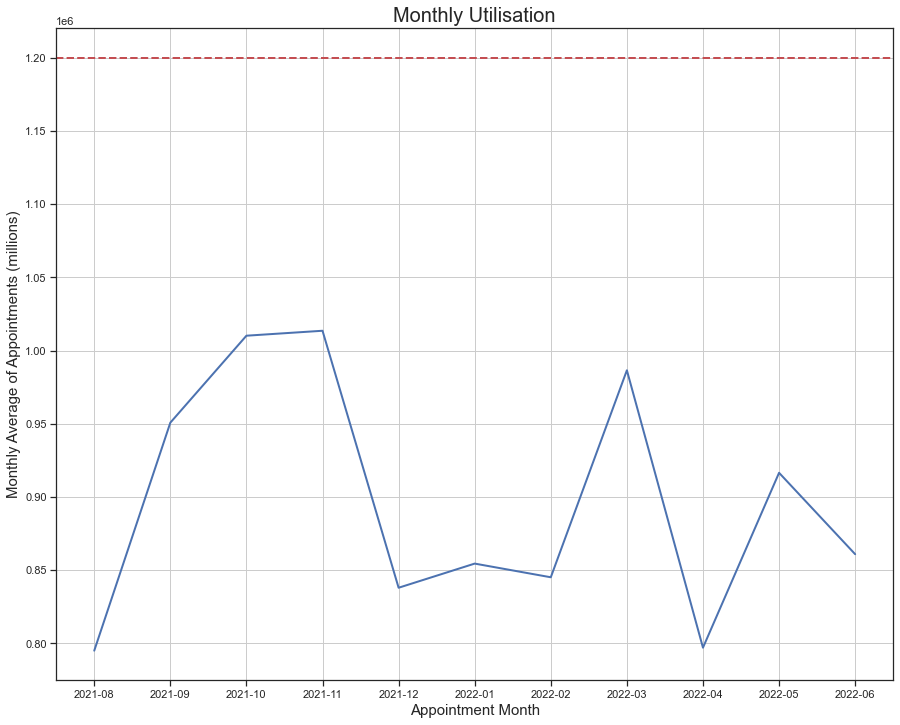

In [74]:
# Plot monthly capacity utilisation.
b=sns.lineplot(x='appointment_month', y='utilisation', data=ar_df, linewidth=2)

# Annotate the axes, labels and ticks.
b.set_xlabel('Appointment Month', fontsize=15)
b.set_ylabel('Monthly Average of Appointments (millions)', fontsize=15)
b.set_title("Monthly Utilisation", fontsize=20)
sns.set_style('ticks',{'axes.grid' : True})

# Add NHS daily limit line of 1,200,000 appointments.
plt.axhline(y=1200000, color='r', linestyle='--', linewidth=2)
i=0

**Question 2:** How do the healthcare professional types differ over time?

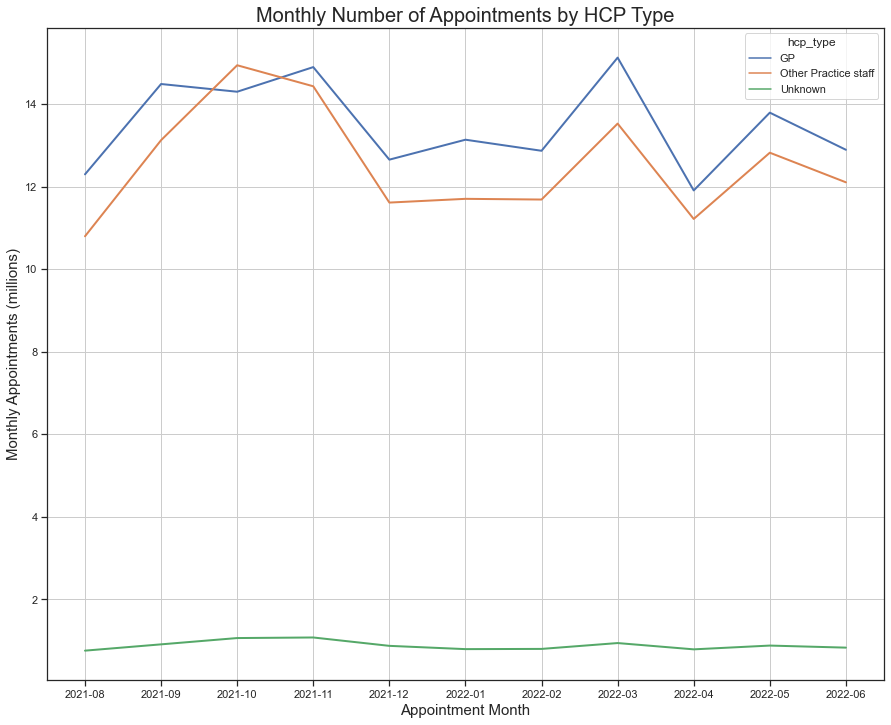

In [75]:
# Create a subset to group by month and hcp type and aggregate the number of appointments.
ar_hcp = ar_agg \
 .groupby(['appointment_month', 'hcp_type'])[['count_of_appointments']] \
 .sum() \
 .reset_index()

# Create a line plot to answer the question.
b=sns.lineplot(x='appointment_month', y='count_of_appointments',
               hue='hcp_type', data=ar_hcp, ci=None, linewidth=2)

# Annotate the axes, label and ticks.
b.set_xlabel('Appointment Month', fontsize=15)
b.set_ylabel('Monthly Appointments (millions)', fontsize=15)
b.set_title("Monthly Number of Appointments by HCP Type", fontsize=20)
ylabels = ['{:,.0f}'.format(y) for y in b.get_yticks()/1000000]
b.set_yticklabels(ylabels)
sns.set_style('ticks',{'axes.grid' : True})

**Question 3:** Are there significant changes in whether or not visits are attended?

  appointment_month appointment_status  count_of_appointments
0           2021-08           Attended               22081765
1           2021-08                DNA                 949137
2           2021-08            Unknown                 821269
3           2021-09           Attended               25757066
4           2021-09                DNA                1321348


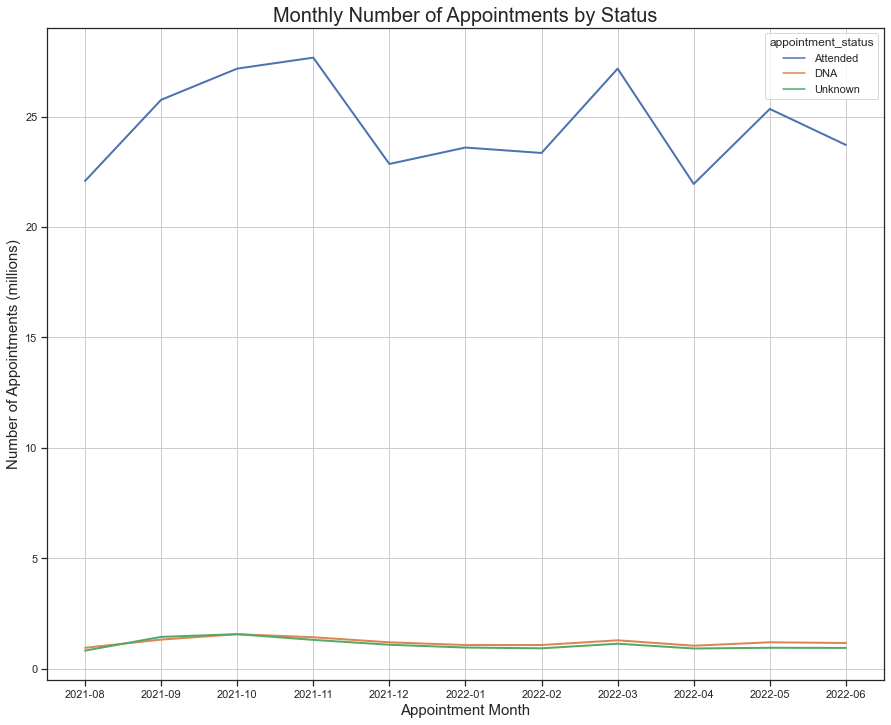

In [76]:
# Create a subset for the lineplot.
ar_as = ar_agg \
 .groupby(['appointment_month', 'appointment_status'])[['count_of_appointments']] \
 .sum() \
 .reset_index()
print(ar_as.head())

# Create a lineplots.
b=sns.lineplot(x='appointment_month', y='count_of_appointments',
               hue='appointment_status', data=ar_as, ci=None, linewidth=2)

# Annotate the axes, labels and ticks.
b.set_xlabel('Appointment Month', fontsize=15)
b.set_ylabel('Number of Appointments (millions)', fontsize=15)
b.set_title("Monthly Number of Appointments by Status", fontsize=20)
ylabels = ['{:,.0f}'.format(y) for y in b.get_yticks()/1000000]
b.set_yticklabels(ylabels)
sns.set_style('ticks',{'axes.grid' : True})
i=0

**Question 4:** Are there changes in terms of appointment type and the busiest months?

  appointment_month appointment_mode  count_of_appointments
0           2021-08     Face-to-Face               13717325
1           2021-08       Home Visit                 151619
2           2021-08        Telephone                9149072
3           2021-08          Unknown                 724126
4           2021-08     Video/Online                 110029


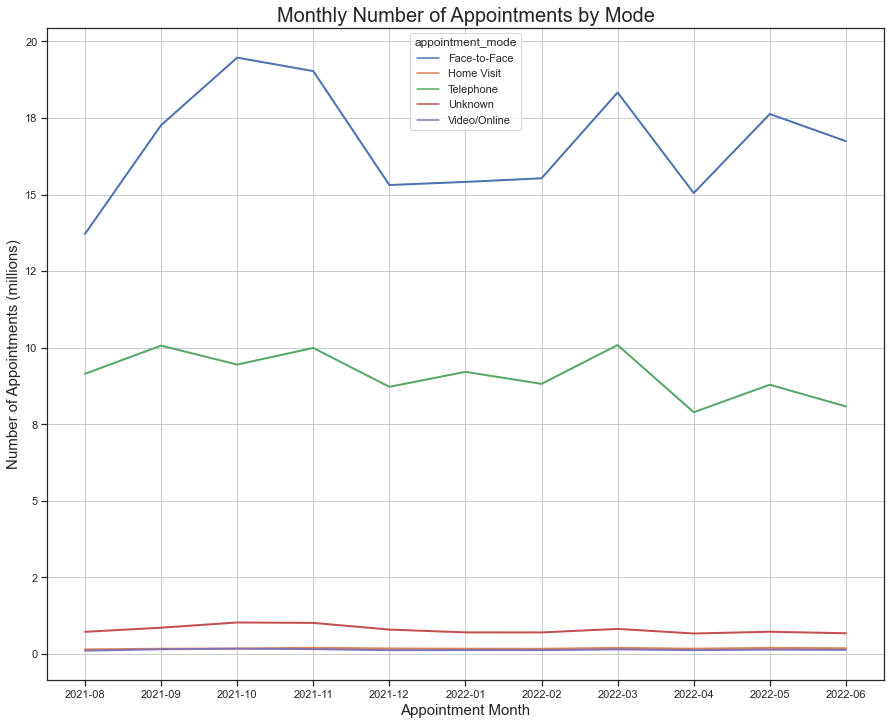

In [77]:
# Create a subset to group and aggregate the data by appointment mode. 
ar_am = ar_agg \
 .groupby(['appointment_month', 'appointment_mode'])[['count_of_appointments']] \
 .sum() \
 .reset_index()
print(ar_am.head())

# Create a line plot.
b=sns.lineplot(x='appointment_month', y='count_of_appointments',
               hue='appointment_mode', data=ar_am, ci=None, linewidth=2)

# Annotate the axes, labels and ticks.
b.set_xlabel('Appointment Month', fontsize=15)
b.set_ylabel('Number of Appointments (millions)', fontsize=15)
b.set_title("Monthly Number of Appointments by Mode", fontsize=20)
ylabels = ['{:,.0f}'.format(y) for y in b.get_yticks()/1000000]
b.set_yticklabels(ylabels)
sns.set_style('ticks',{'axes.grid' : True})
i=0

**Question 5:** Are there any trends in time between booking an appointment?

  appointment_month time_between_book_and_appointment  count_of_appointments
0           2021-08                             1 Day                2018319
1           2021-08                    15  to 21 Days                1453209
2           2021-08                       2 to 7 Days                4924960
3           2021-08                    22  to 28 Days                 828866
4           2021-08                     8  to 14 Days                2889150


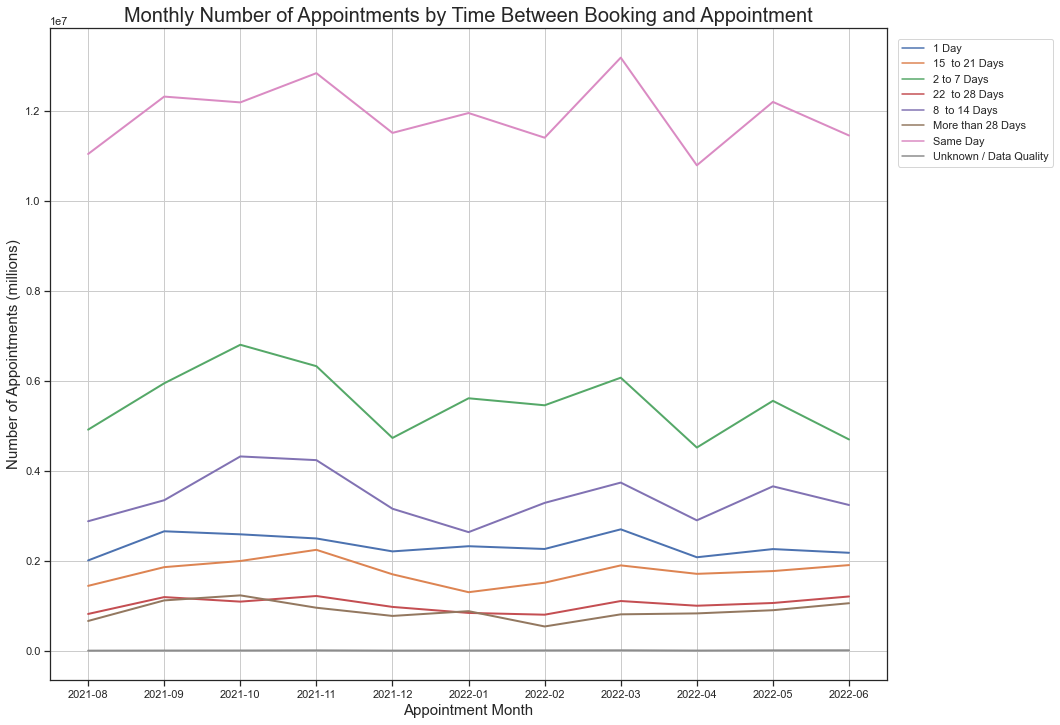

In [78]:
# Create a subset to answer the question by using monthly grouping.
ar_time = ar_agg \
 .groupby(['appointment_month', 'time_between_book_and_appointment'])[['count_of_appointments']] \
 .sum() \
 .reset_index()
print(ar_time.head())

# Create a line plot to answer the question.
b=sns.lineplot(x='appointment_month', y='count_of_appointments',
               hue='time_between_book_and_appointment', data=ar_time, linewidth=2)

# Annotate the axes, labels and ticks.
b.set_xlabel('Appointment Month', fontsize=15)
b.set_ylabel('Number of Appointments (millions)', fontsize=15)
b.set_title("Monthly Number of Appointments by Time Between Booking and Appointment", fontsize=20)
sns.set_style('ticks',{'axes.grid' : True})
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', borderaxespad=1)
i=0

**Question 6:** How do the spread of service settings compare?

In [79]:
# Let's go back to the national category DataFrame you created in an earlier assignment activity.
nc.head()

,appointment_date,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,count_of_appointments,appointment_month
0,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Primary Care Network,Care Related Encounter,Patient contact during Care Home Round,3,2021-08
1,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Other,Care Related Encounter,Planned Clinics,7,2021-08
2,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Home Visit,79,2021-08
3,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,General Consultation Acute,725,2021-08
4,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Structured Medication Review,2,2021-08


In [80]:
# Create a new DataFrame consisting of the month of appointment and the number of appointments.
nc_new = nc \
 .groupby(['appointment_month', 'service_setting'])[['count_of_appointments']] \
 .sum() \
 .reset_index()

# View the DataFrame.
nc_new.tail()

,appointment_month,service_setting,count_of_appointments
50,2022-06,Extended Access Provision,209652
51,2022-06,General Practice,23680374
52,2022-06,Other,478813
53,2022-06,Primary Care Network,700599
54,2022-06,Unmapped,758640


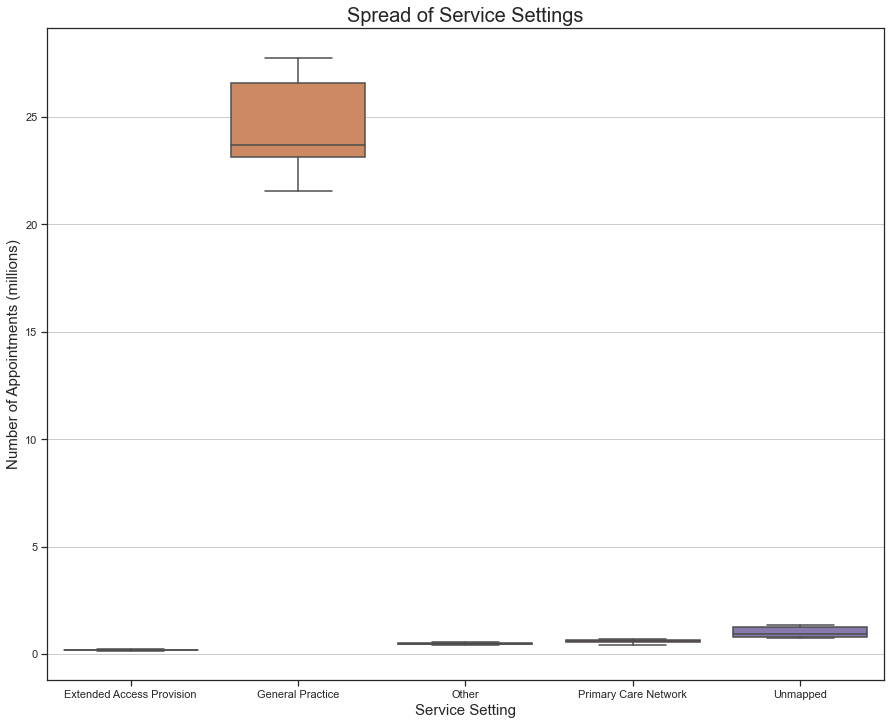

In [81]:
# Create a boxplot to investigate spread of service settings.
graph = sns.boxplot(data=nc_new, x='service_setting', y='count_of_appointments')

# Annotate the axes, labels and ticks.
graph.set_xlabel('Service Setting', fontsize=15)
graph.set_ylabel('Number of Appointments (millions)', fontsize=15)
graph.set_title("Spread of Service Settings", fontsize=20)
ylabels = ['{:,.0f}'.format(y) for y in graph.get_yticks()/1000000]
graph.set_yticklabels(ylabels)
i=0

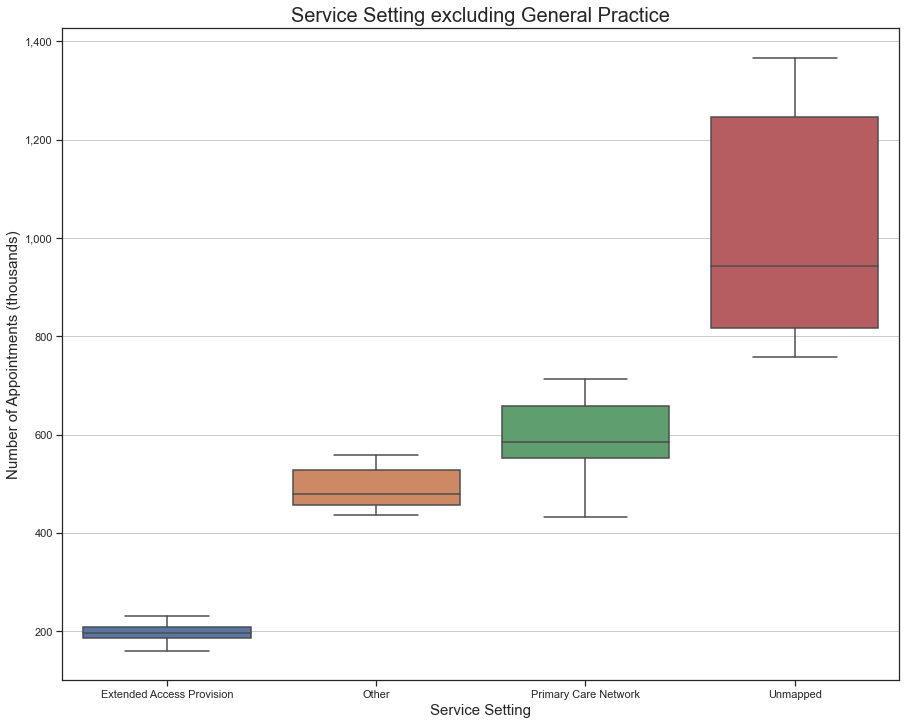

In [82]:
# Subset to aggregate the data and exclude GP.
nc_ex = nc[nc['service_setting'] != "General Practice"] \
    .groupby(['appointment_month', 'service_setting'])[['count_of_appointments']] \
    .sum() \
    .reset_index()

# Create a boxplot to investigate the service settings without GP.
graph = sns.boxplot(data=nc_ex, x='service_setting', y='count_of_appointments')

# Annotate the axes, labels and ticks.
graph.set_xlabel('Service Setting', fontsize=15)
graph.set_ylabel('Number of Appointments (thousands)', fontsize=15)
graph.set_title("Service Setting excluding General Practice", fontsize=20)
ylabels = ['{:,.0f}'.format(y) for y in graph.get_yticks()/1000]
graph.set_yticklabels(ylabels)
i=0

## Activity 6 conclusions: recomendations.
- The timeframe is betweet 01/2020 and 06/2022.
     - Should the NHS start looking at increasing staff levels?
- Maximum daily appoinments number of 1.2mln wasn't reached even during busiest months using average daily utilisation rate. Hire more to increase the capacity or restructure the system to have extended service over weekends, especially during high season. Add more online appointments.
    - How do the healthcare professional types differ over time?
 - All appointements were almost equally delivered by GP and Other Practice Staff (nurses etc.). Only in October 2021 they were over GP.
    - Are there significant changes in whether or not visits are attended?
- There were no significant changes in DNA and they stay flat at about 3-6% of total appointements.
    - Are there changes in terms of appointment type and the busiest months?
- Face to face and over the phone had the largest share. Face to face group was more sensitive to growing number of appointments during October and November 2021. Home visits and online stay did not fluctuate.   
    - Are there any trends in time between booking and appointment?
- Largest number of appointments were made the same day, followed by 2-7 days. During the pick season of October-November 2021 number of 2-7 days and 8-14 days appointments incresed slightly more than the same day. Longer period appointements (over 15 days) overall were not that sensitive. Next day appointments were not that sensitive as well.
    - How do the various service settings compare?
- Boxplot is used to analyse the distribution of number of appointements for each group: Extended Access Provision - lowest dispersion. 

In [83]:
# Create a subset by grouping by month, time  and between booking and appointment and hcp type.
ar_timehcp = ar_agg \
 .groupby(['appointment_month', 'time_between_book_and_appointment','hcp_type'])[['count_of_appointments']] \
 .sum() \
 .reset_index()
ar_hcp1.head()

# Create a barplot to look what kind of appointment done by who.
hcp=sns.barplot(x='time_between_book_and_appointment', y='count_of_appointments',
               hue='hcp_type', data=ar_timehcp)

# Annotate the axes, labels and ticks.
hcp.set_xlabel('Time Between Booking and Appoitment', fontsize=15)
hcp.set_ylabel('Number of Appointments (millions)', fontsize=15)
hcp.set_title("Time Between Booking and Appoitment by HCP Type", fontsize=20)
ylabels = ['{:,.0f}'.format(y) for y in graph.get_yticks()/1000000]
graph.set_yticklabels(ylabels)
i=0

NameError: name 'ar_hcp1' is not defined

# 

### Provide a summary of your findings and recommendations based on the analysis.

Based on the data, the number of daily appointments systematically exceeds the NHS capacity of 1,200,000 a day. It is becoming a problem during high season, especially at the busiest locations.

The highest utilisation rate of 84.5%  - November 2021, but it used 30 days base. As most of practices stay closed over weekends it doesn’t show how the things really are.

**Recomendations:**

- Extend Enhanced Access to deliver more General Consultation Routine. Including opening some practices in the busiest locations over weekends and extend hours to reflect local needs.
    
- As Mondays are the busiest book less follow up appointments and leave more spaces for urgent and same day.
- Use more video/online appointments capacity.
- Increase capacity of Planned Clinic and Procedures to prevent potential growth of General Consultation Acute appointments.
- Review and improve IT within the NHS to decrease the number of “Unmapped” data.
